## Differentiation and Derivatives
So far in this course, you've learned how to evaluate limits for points on a line. Now you're going to build on that knowledge and look at a calculus technique called *differentiation*. In differentiation, we use our knowledge of limits to calculate the *derivative* of a function in order to determine the rate of change at an individual point on a line.

Let's remind ourselves of the problem we're trying to solve, here's a function:

\begin{equation}f(x) = x^{2} + x\end{equation}

We can visualize part of the line that this function defines using the folllowing Python code:

In [ ]:
%matplotlib inline

# Here's the function
def f(x):
    return x**2 + x

from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

plt.show()

Now, we know that we can calculate the average rate of change for a given interval on the line by calculating the slope for a secant line that connects two points on the line. For example, we can calculate the average change for the interval between x=4 and x=6 by dividing the change (or *delta*, indicated as &Delta;) in the value of *f(x)* by the change in the value of *x*:

\begin{equation}m = \frac{\Delta{f(x)}}{\Delta{x}} \end{equation}

The delta for *f(x)* is calculated by subtracting the *f(x)* values of our points, and the delta for *x* is calculated by subtracting the *x* values of our points; like this:

\begin{equation}m = \frac{f(x)_{2} - f(x)_{1}}{x_{2} - x_{1}} \end{equation}

So for the interval between x=4 and x=6, that's:

\begin{equation}m = \frac{f(6) - f(4)}{6 - 4} \end{equation}

We can calculate and plot this using the following Python:

In [ ]:
%matplotlib inline

def f(x):
    return x**2 + x

from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the a values
x1 = 4
x2 = 6

# Get the corresponding f(x) values 
y1 = f(x1)
y2 = f(x2)

# Calculate the slope by dividing the deltas
a = (y2 - y1)/(x2 - x1)

# Create an array of x values for the secant line
sx = [x1,x2]

# Use the function to get the y values
sy = [f(i) for i in sx]

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the interval points
plt.scatter([x1,x2],[y1,y2], c='red')

# Plot the secant line
plt.plot(sx,sy, color='magenta')

# Display the calculated average rate of change
plt.annotate('Average change =' + str(a),(x2, (y2+y1)/2))

plt.show()

The average rate of change for the interval between x=4 and x=6 is <sup>11</sup>/<sub>1</sub> (or simply 11), meaning that for every **1** added to *x*, *f(x)* increases by **11**. Put another way, if x represents time in seconds and f(x) represents distance in meters, the average rate of change for distance over time (in other words, *velocity*) for the 4 to 6 second interval is 11 meters-per-second.

So far, this is just basic algebra; but what if instead of the average rate of change over an interval, we want to calculate the rate of change at a single point, say, where x = 4.5?

One approach we could take is to create a secant line between the point at which we want the slope and another point on the function line that is infintesimally close to it. So close in fact that the secant line is actually a tangent that goes through both points. We can then calculate the slope for the secant line as before. This would look something like the graph produced by the following code:

In [ ]:
%matplotlib inline

def f(x):
    return x**2 + x

from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the x1 point, arbitrarily 5
x1 = 4.5
y1 = f(x1)

# Set the x2 point, very close to x1
x2 = 5.000000001
y2 = f(x2)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('x' + str(x1),(x1,y1), xytext=(x1-0.5, y1+3))

# Approximate the tangent slope and plot it
m = (y2-y1)/(x2-x1)
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

## Calculating a Derivative
In the Python code above, we created the (almost) tangential secant line by specifying a point that is very close to the point at which we want to calculate the rate of change. This is adequate to show the line conceptually in the graph, but it's not a particularly generalizable (or accurate) way to actually calculate the line so that we can get the rate of change at any given point.

If only we knew of a way to calculate a point on the line that is as close as possible to point with a given *x* value.

Oh wait, we do! It's a *limit*.

So how do we apply a limit in this scenario? Well, let's start by examining our general approach to calculating slope in a little more detail.Our tried and tested approach is to plot a secant line between two points at different values of x, so let's plot an arbitrary (*x,y*) point, and then add an arbitrary amount to *x*, which we'll call *h*. Then we know that we can plot a secant line between (*x,f(x)*) and (*x+h,f(x+h)*) and find its slope.

Run the cell below to see these points:

In [ ]:
%matplotlib inline

def f(x):
    return x**2 + x


from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the x point
x1 = 3
y1 = f(x1)

# set the increment
h = 3

# set the x+h point
x2 = x1+h
y2 = f(x2)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the x point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the x+h point
plt.scatter(x2,y2, c='red')
plt.annotate('(x+h, f(x+h))',(x2,y2), xytext=(x2+0.5, y2))

plt.show()

As we saw previously, our formula to calculate slope is:

\begin{equation}m = \frac{\Delta{f(x)}}{\Delta{x}} \end{equation}

The delta for *f(x)* is calculated by subtracting the *f(x + h)* and *f(x)* values of our points, and the delta for *x* is just the difference between *x* and *x + h*; in other words, *h*:

\begin{equation}m = \frac{f(x + h) - f(x)}{h} \end{equation}

What we actually need is the slope at the shortest possible distance between x and x+h, so we're looking for the smallest possible value of *h*. In other words, we need the limit as *h* approaches 0.

\begin{equation}\lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

This equation is generalizable, and we can use it as the definition of a function to help us find the slope at any given value of *x* on the line, and it's what we call the *derivative* of our original function (which in this case is called *f*). This is generally indicated in *Lagrange* notation like this:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

You'll also sometimes see derivatives written in *Leibniz's* notation like this:

\begin{equation}\frac{d}{dx}f(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

***Note:*** *Some textbooks use **h** to symbolize the difference between **x<sub>0</sub>** and **x<sub>1</sub>**, while others use **&Delta;x**. It makes no diffrerence which symbolic value you use.*

#### Alternate Form for a Derivative
The formula above shows the generalized form for a derivative. You can use the derivative function to get the slope at any given point, for example to get the slope at point *a* you could just plug the value for *a* into the generalized derivative function:

\begin{equation}f'(\textbf{a}) = \lim_{h \to 0} \frac{f(\textbf{a} + h) - f(\textbf{a})}{h} \end{equation}

Or you could use the alternate form, which is specific to point *a*:

\begin{equation}f'(a) = \lim_{x \to a} \frac{f(x) - f(a)}{x - a} \end{equation}

These are mathematically equivalent.

### Finding the Derivative for a Specific Point
It's easier to understand differentiation by seeing it in action, so let's use it to find the derivitive for a specific point in the function ***f***.

Here's the definition of function ***f***:

\begin{equation}f(x) = x^{2} + x\end{equation}

Let's say we want to find ***f'(2)*** (the derivative for ***f*** when ***x*** is 2); so we're trying to find the slope at the point shown by the following code:

In [ ]:
%matplotlib inline

def f(x):
    return x**2 + x

from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the point
x1 = 2
y1 = f(x1)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

plt.show()

Here's our generalized formula for finding a derivative at a specific point (*a*):

\begin{equation}f'(a) = \lim_{h \to 0} \frac{f(a + h) - f(a)}{h} \end{equation}

So let's just start by plugging our *a* value in:

\begin{equation}f'(\textbf{2}) = \lim_{h \to 0} \frac{f(\textbf{2} + h) - f(\textbf{2})}{h} \end{equation}

We know that ***f(x)*** encapsulates the equation ***x<sup>2</sup> + x***, so we can rewrite our derivative equation as:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{((2+h)^{2} + 2 + h) - (2^{2} + 2)}{h} \end{equation}

We can apply the distribution property to ***(2 + h)<sup>2</sup>*** using the rule that *(a + b)<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup> + 2ab*:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - (2^{2} + 2)}{h} \end{equation}

Then we can simplify 2<sup>2</sup> + 2 (2<sup>2</sup> is 4, plus 2 gives is 6):

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(4 + h^{2} + 4h + 2 + h) - 6}{h} \end{equation}

We can combine like terms on the left side of the numerator to make things a little clearer:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{(h^{2} + 5h + 6) - 6}{h} \end{equation}

Which combines even further to get rid of the *6*:

\begin{equation}f'(2) = \lim_{h \to 0} \frac{h^{2} + 5h}{h} \end{equation}

And finally, we can simplify the fraction:

\begin{equation}f'(2) = \lim_{h \to 0} h + 5 \end{equation}

To get the limit when *h* is approaching 0, we can use direct substitution for h:

\begin{equation}f'(2) = 0 + 5 \end{equation}

so:

\begin{equation}f'(2) = 5 \end{equation}

Let's draw a tangent line with that slope on our graph to see if it looks right:

In [ ]:
%matplotlib inline

def f(x):
    return x**2 + x


from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the point
x1 = 2
y1 = f(x1)

# Specify the derivative we calculated above
m = 5

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the tangent line using the derivative we calculated
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

### Finding a Derivative for Any Point
Now let's put it all together and define a function that we can use to find the derivative for any point in the ***f*** function:

Here's our general derivative function again:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

We know that ***f(x)*** encapsulates the equation ***x<sup>2</sup> + x***, so we can rewrite our derivative equation as:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{((x+h)^{2} + x + h) - (x^{2} + x)}{h} \end{equation}

We can apply the distribution property to ***(x + h)<sup>2</sup>*** using the rule that *(a + b)<sup>2</sup> = a<sup>2</sup> + b<sup>2</sup> + 2ab*:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{(x^{2} + h^{2} + 2xh + x + h) - (x^{2} + x)}{h} \end{equation}

Then we can use the distributive property to expand ***- (x<sup>2</sup> + x)***, which is the same thing as *-1(x<sup>2</sup> + x)*, to ***- x<sup>2</sup> - x***:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{x^{2} + h^{2} + 2xh + x + h - x^{2} - x}{h} \end{equation}

We can combine like terms on the numerator to make things a little clearer:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{h^{2} + 2xh + h}{h} \end{equation}

And finally, we can simplify the fraction:

\begin{equation}f'(x) = \lim_{h \to 0} 2x + h + 1 \end{equation}

To get the limit when *h* is approaching 0, we can use direct substitution for h:

\begin{equation}f'(x) = 2x + 0 + 1 \end{equation}

so:

\begin{equation}f'(x) = 2x + 1 \end{equation}

Now we have a function for the derivative of ***f***, which we can apply to any *x* value to find the slope of the function at ***f(x***).

For example, let's find the derivative of ***f*** with an *x* value of 5:

\begin{equation}f'(5) = 2\cdot5 + 1 = 10 + 1 = 11\end{equation}

Let's use Python to define the ***f(x)*** and ***f'(x)*** functions, plot ***f(5)*** and show the tangent line for ***f'(5)***:

In [ ]:
%matplotlib inline

# Create function f
def f(x):
    return x**2 + x

# Create derivative function for f
def fd(x):
    return (2 * x) + 1

from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(0, 11))

# Use the function to get the y values
y = [f(i) for i in x]

# Set the point
x1 = 5
y1 = f(x1)

# Calculate the derivative using the derivative function
m = fd(x1)

# Set up the graph
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the point
plt.scatter(x1,y1, c='red')
plt.annotate('(x,f(x))',(x1,y1), xytext=(x1-0.5, y1+3))

# Plot the tangent line using the derivative we calculated
xMin = x1 - 3
yMin = y1 - (3*m)
xMax = x1 + 3
yMax = y1 + (3*m)
plt.plot([xMin,xMax],[yMin,yMax], color='magenta')

plt.show()

## Differentiability
It's important to realize that a function may not be *differentiable* at every point; that is, you might not be able to calculate the derivative for every point on the function line.

To be differentiable at a given point:
- The function must be *continuous* at that point.
- The tangent line at that point cannot be vertical
- The line must be *smooth* at that point (that is, it cannot take on a sudden change of direction at the point)

For example, consider the following (somewhat bizarre) function:

\begin{equation}
q(x) = \begin{cases}
  \frac{40,000}{x^{2}}, & \text{if } x < -4, \\
  (x^{2} -2) \cdot (x - 1), & \text{if } x \ne 0 \text{ and } x \ge -4 \text{ and } x < 8, \\
  (x^{2} -2), & \text{if } x \ne 0 \text{ and } x \ge 8
\end{cases}
\end{equation}

In [ ]:
%matplotlib inline

# Define function q
def q(x):
    if x != 0:
        if x < -4:
            return 40000 / (x**2)
        elif x < 8:
            return (x**2 - 2) * x - 1
        else:
            return (x**2 - 2)


# Plot output from function g
from matplotlib import pyplot as plt

# Create an array of x values
x = list(range(-10, -5))
x.append(-4.01)
x2 = list(range(-4,8))
x2.append(7.9999)
x2 = x2 + list(range(8,11))

# Get the corresponding y values from the function
y = [q(i) for i in x]
y2 = [q(i) for i in x2]

# Set up the graph
plt.xlabel('x')
plt.ylabel('q(x)')
plt.grid()

# Plot x against q(x)
plt.plot(x,y, color='purple')
plt.plot(x2,y2, color='purple')


plt.scatter(-4,q(-4), c='red')
plt.annotate('A (x= -4)',(-5,q(-3.9)), xytext=(-7, q(-3.9)))

plt.scatter(0,0, c='red')
plt.annotate('B (x= 0)',(0,0), xytext=(-1, 40))

plt.scatter(8,q(8), c='red')
plt.annotate('C (x= 8)',(8,q(8)), xytext=(8, 100))

plt.show()

The points marked on this graph are non-differentiable:
- Point **A** is non-continuous - the limit from the negative side is infinity, but the limit from the positive side &approx; -57
- Point **B** is also non-continuous - the function is not defined at x = 0.
- Point **C** is defined and continuous, but the sharp change in direction makes it non-differentiable.

## Derivatives of Equations

We've been talking about derivatves of *functions*, but it's important to remember that functions are just named operations that return a value. We can apply what we know about calculating derivatives to any equation, for example:

\begin{equation}\frac{d}{dx}(2x + 6)\end{equation}

Note that we generally switch to *Leibniz's* notation when finding derivatives of equations that are not encapsulated as functions; but the approach for solving this example is exactly the same as if we had a hypothetical function with the definition *2x + 6*:

\begin{equation}\frac{d}{dx}(2x + 6) = \lim_{h \to 0} \frac{(2(x+h) + 6) - (2x + 6)}{h} \end{equation}

After factoring out the* 2(x+h)* on the left and the *-(2x - 6)* on the right, this is:

\begin{equation}\frac{d}{dx}(2x + 6) = \lim_{h \to 0} \frac{2x + 2h + 6 - 2x - 6}{h} \end{equation}

We can simplify this to:

\begin{equation}\frac{d}{dx}(2x + 6) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Now we can factor *h* out entirely, so at any point:

\begin{equation}\frac{d}{dx}(2x + 6) = 2 \end{equation}

If you run the Python code below to plot the line created by the equation, you'll see that it does indeed have a constant slope of 2:

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

# Create an array of x values from 0 to 10 to plot
x = list(range(1, 11))

# Use the function to get the y values
y = [(2*i) + 6 for i in x]

# Set up the graph
plt.xlabel('x')
plt.xticks(range(1,11, 1))
plt.ylabel('y')
plt.yticks(range(8,27, 1))
plt.grid()

# Plot the function
plt.plot(x,y, color='purple')


plt.show()

## Derivative Rules and Operations
When working with derivatives, there are some rules, or shortcuts, that you can apply to make your life easier.

### Basic Derivative Rules
Let's start with some basic rules that it's useful to know.

- If *f(x)* = *C* (where *C* is a constant), then *f'(x)* = 0

    This makes sense if you think about it for a second. No matter what value you use for *x*, the function returns the same constant value; so the graph of the function will be a horizontal line. There's no rate of change in a horiziontal line, so its slope is 0 at all points. This is true of any constant, including symbolic constants like *&pi;* (pi).
    
    So, for example:
    
\begin{equation}f(x) = 6 \;\; \therefore \;\; f'(x) = 0 \end{equation}

    Or:

\begin{equation}f(x) = \pi \;\; \therefore \;\; f'(x) = 0 \end{equation}
    
- If *f(x)* = *Cg(x)*, then *f'(x)* = *Cg'(x)*

    This rule tells us that if a function is equal to a second function multiplied by a constant, then the derivative of the first function will be equal to the derivative of the second function multiplied by the same constant. For example:
    
\begin{equation}f(x) = 2g(x) \;\; \therefore \;\; f'(x) = 2g'(x) \end{equation}

- If *f(x)* = *g(x)* + *h(x)*, then *f'(x)* = *g'(x)* + *h'(x)*

    In other words, if a function is the sum of two other functions, then the derivative of the first function is the sum of the derivatives of the other two functions. For example:
    
\begin{equation}f(x) = g(x) + h(x) \;\; \therefore \;\; f'(x) = g'(x) + h'(x) \end{equation}

    Of course, this also applies to subtraction:
    
\begin{equation}f(x) = k(x) - l(x) \;\; \therefore \;\; f'(x) = k'(x) - l'(x) \end{equation}

As discussed previously, functions are just equations encapsulated as a named entity that return a value; and the rules can be applied to any equation. For example:

\begin{equation}\frac{d}{dx}(2x + 6) = \frac{d}{dx} 2x +  \frac{d}{dx} 6\end{equation}

So we can take advantage of the rules to make the calculation a little easier:

\begin{equation}\frac{d}{dx}(2x) = \lim_{h \to 0} \frac{2(x+h) - 2x}{h} \end{equation}

After factoring out the* 2(x+h)* on the left, this is:

\begin{equation}\frac{d}{dx}(2x) = \lim_{h \to 0} \frac{2x + 2h - 2x}{h} \end{equation}

We can simplify this to:

\begin{equation}\frac{d}{dx}(2x) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Which gives us:

\begin{equation}\frac{d}{dx}(2x) = 2 \end{equation}

Now we can turn our attention to the derivative of the constant 6 with respect to *x*, and we know that the derivative of a constant is always 0, so:

\begin{equation}\frac{d}{dx}(6) = 0\end{equation}

We add the two derivatives we calculated:

\begin{equation}\frac{d}{dx}(2x + 6) = 2 + 0\end{equation}

Which gives us our result:

\begin{equation}\frac{d}{dx}(2x + 6) = 2\end{equation}


### The Power Rule
The *power rule* is one of the most useful shortcuts in the world of differential calculus. It can be stated like this:

\begin{equation}f(x) = x^{n} \;\; \therefore \;\; f'(x) = nx^{n-1}\end{equation}

So if our function for *x* returns *x* to the power of some constant (which we'll call *n*), then the derivative of the function for *x* is *n* times *x* to the power of *n* - 1.

It's probably helpful to look at a few examples to see how this works:

\begin{equation}f(x) = x^{3} \;\; \therefore \;\; f'(x) = 3x^{2}\end{equation}

\begin{equation}f(x) = x^{-2} \;\; \therefore \;\; f'(x) = -2x^{-3}\end{equation}

\begin{equation}f(x) = x^{2} \;\; \therefore \;\; f'(x) = 2x\end{equation}

In each of these examples, the exponential of *x* in the function definition becomes the coefficient for *x* in the derivative definition, with the exponential is decremented by 1.

Here's a worked example to find the derivative of the following function:

\begin{equation}f(x) = x^{2}\end{equation}

So we start with the general derivative function:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{f(x + h) - f(x)}{h} \end{equation}

We can plug in our definition for *f*:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{(x + h)^{2} - x^{2}}{h} \end{equation}

Now we can factor out the perfect square binomial on the left:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{x^{2} + h^{2} + 2xh - x^{2}}{h} \end{equation}

The x<sup>2</sup> terms cancel each other out so we get to:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{h^{2} + 2xh}{h} \end{equation}

Which simplifies to:

\begin{equation}f'(x) = \lim_{h \to 0} h + 2x \end{equation}

With *h* approaching 0, this is:

\begin{equation}f'(x) = 0 + 2x \end{equation}

So our answer is:

\begin{equation}f'(x) = 2x \end{equation}

Note that we could have achieved the same result by simply applying the power rule and transforming x<sup>2</sup> to 2x<sup>1</sup> (which is the same as 2x).

### The Product Rule
The product rule can be stated as:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) \end{equation}

OK, let's break that down. What it's saying is that the derivative of *f(x)* multiplied by *g(x)* is equal to the derivative of *f(x)* multiplied by the value of *g(x)* added to the value of *f(x)* multiplied by the derivative of *g(x*).

Let's see an example based on the following two functions:

\begin{equation}f(x) = 2x^{2} \end{equation}

\begin{equation}g(x) = x + 1 \end{equation}

Let's start by calculating the derivative of *f(x)*:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{2(x + h)^{2} - 2x^{2}}{h} \end{equation}

This factors out to:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{2x^{2} + 2h^{2} + 4xh - 2x^{2}}{h} \end{equation}

Which when we cancel out the 2x<sup>2</sup> and -2x<sup>2</sup> is:

\begin{equation}f'(x) = \lim_{h \to 0} \frac{2h^{2} + 4xh}{h} \end{equation}

Which simplifies to:

\begin{equation}f'(x) = \lim_{h \to 0} 2h + 4x \end{equation}

With *h* approaching 0, this is:

\begin{equation}f'(x) = 4x \end{equation}

Now let's look at *g'(x)*:

\begin{equation}g'(x) = \lim_{h \to 0} \frac{(x + h) + 1 - (x + 1)}{h} \end{equation}

We can just remove the brackets on the left and factor out the *-(x + 1)* on the right:

\begin{equation}g'(x) = \lim_{h \to 0} \frac{x + h + 1 - x - 1}{h} \end{equation}

Which can be cleaned up to:

\begin{equation}g'(x) = \lim_{h \to 0} \frac{h}{h} \end{equation}

Enabling us to factor *h* out completely to give a constant derivative of *1*:

\begin{equation}g'(x) = 1 \end{equation}

So now we can calculate the derivative for the product of these functions by plugging the functions and the derivatives we've calculated for them into the product rule equation:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = f'(x)g(x) + f(x)g'(x) \end{equation}

So:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = (4x \cdot (x + 1)) + (2x^{2} \cdot 1) \end{equation}

Which can be simplified to:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = (4x^{2} + 4x) + 2x^{2} \end{equation}

Which can be further simplified to:

\begin{equation}\frac{d}{dx}[f(x)g(x)] = 6x^{2} + 4x \end{equation}

### The Quotient Rule
The *quotient rule* applies to functions that are defined as a quotient of one expression divided by another; for example:

\begin{equation}r(x) = \frac{s(x)}{t(x)} \end{equation}

In this situation, you can apply the following quotient rule to find the derivative of *r(x)*:

\begin{equation}r'(x) = \frac{s'(x)t(x) - s(x)t'(x)}{[t(x)]^{2}} \end{equation}

Here are our definitions for *s(x)* and *t(x)*:

\begin{equation}s(x) = 3x^{2} \end{equation}

\begin{equation}t(x) = 2x\end{equation}

Let's start with *s'(x)*:

\begin{equation}s'(x) = \lim_{h \to 0} \frac{3(x + h)^{2} - 3x^{2}}{h} \end{equation}

This factors out to:

\begin{equation}s'(x) = \lim_{h \to 0} \frac{3x^{2} + 3h^{2} + 6xh - 3x^{2}}{h} \end{equation}

Which when we cancel out the 3x<sup>2</sup> and -3x<sup>2</sup> is:

\begin{equation}s'(x) = \lim_{h \to 0} \frac{3h^{2} + 6xh}{h} \end{equation}

Which simplifies to:

\begin{equation}s'(x) = \lim_{h \to 0} 3h + 6x \end{equation}

With *h* approaching 0, this is:

\begin{equation}s'(x) = 6x \end{equation}

Now let's look at *t'(x)*:

\begin{equation}t'(x) = \lim_{h \to 0} \frac{2(x + h) - 2x}{h} \end{equation}

We can just factor out the *2(x + h)* on the left:

\begin{equation}t'(x) = \lim_{h \to 0} \frac{2x + 2h - 2x}{h} \end{equation}

Which can be cleaned up to:

\begin{equation}t'(x) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Enabling us to factor *h* out completely to give a constant derivative of *2*:

\begin{equation}t'(x) = 2 \end{equation}

So now we can calculate the derivative for the quotient of these functions by plugging the function definitions and the derivatives we've calculated for them into the quotient rule equation:

\begin{equation}r'(x) = \frac{(6x \cdot 2x) - (3x^{2} \cdot 2)}{[2x]^{2}} \end{equation}

We can factor out the numerator terms like this:

\begin{equation}r'(x) = \frac{12x^{2} - 6x^{2}}{[2x]^{2}} \end{equation}

Which can then be combined:

\begin{equation}r'(x) = \frac{6x^{2}}{[2x]^{2}} \end{equation}

The denominator is [2x]<sup>2</sup> (note that this is different from 2x<sup>2</sup>. [2x]<sup>2</sup> is 2x &bull; 2x, whereas  2x<sup>2</sup> is 2 &bull; x<sup>2</sup>):

\begin{equation}r'(x) = \frac{6x^{2}}{4x^{2}} \end{equation}

Which simplifies to:

\begin{equation}r'(x) = 1\frac{1}{2} \end{equation}

So the derivative of *r(x)* is 1.5.

### The Chain Rule

The *chain rule* takes advantage of the fact that equations can be encapsulated as functions, and since functions contain equations, it's possible to nest one function within another.

For example, consider the following function:

\begin{equation}u(x) = 2x^{2} \end{equation}

We could view the definition of *u(x)* as a composite of two functions,; an *inner* function that calculates x<sup>2</sup>, and an *outer* function that multiplies the result of the inner function by 2.

\begin{equation}u(x) = \widehat{\color{blue}2\color{blue}(\underline{\color{red}x^{\color{red}2}}\color{blue})} \end{equation}

To make things simpler, we can name these inner and outer functions:

\begin{equation}i(x) = x^{2} \end{equation}

\begin{equation}o(x) = 2x \end{equation}

Note that *x* indicates the input for each function. Function *i* takes its input and squares it, and function *o* takes its input and multiplies it by 2. When we use these as a composite function, the *x* value input into the outer function will be the output from the inner function.

Let's take a look at how we can apply these functions to get back to our original *u* function:

\begin{equation}u(x) = o(i(x)) \end{equation}

So first we need to find the output of the inner *i* function so we can use at as the input value for the outer *o* function. Well, that's easy, we know the definition of *i* (square the input), so we can just plug it in:

\begin{equation}u(x) = o(x^{2}) \end{equation}

We also know the definition for the outer *o* function (multiply the input by 2), so we can just apply that to the input:

\begin{equation}u(x) = 2x^{2} \end{equation}

OK, so now we know how to form a composite function. The *chain rule* can be stated like this:

\begin{equation}\frac{d}{dx}[o(i(x))] = o'(i(x)) \cdot i'(x)\end{equation}

Alright, let's start by plugging the output of the inner *i(x)* function in:

\begin{equation}\frac{d}{dx}[o(i(x))] = o'(x^{2}) \cdot i'(x)\end{equation}

Now let's use that to calculate the derivative of *o*, replacing each *x* in the equation with the output from the *i* function (*x<sup>2</sup>*):

\begin{equation}o'(x) = \lim_{h \to 0} \frac{2(x^{2} + h) - 2x^{2}}{h} \end{equation}

This factors out to:

\begin{equation}o'(x) = \lim_{h \to 0} \frac{2x^{2} + 2h - 2x^{2}}{h} \end{equation}

Which when we cancel out the 2x<sup>2</sup> and -2x<sup>2</sup> is:

\begin{equation}o'(x) = \lim_{h \to 0} \frac{2h}{h} \end{equation}

Which simplifies to:

\begin{equation}o'(x) = 2 \end{equation}

Now we can calculate *i'(x)*. We know that the definition of *i(x)* is x<sup>2</sup>, and we can use the power rule to determine that *i'(x)* is therefore 2x.

So our equation at this point is:

\begin{equation}\frac{d}{dx}[o(i(x))] = 2 \cdot 2x\end{equation}

Which is:

\begin{equation}\frac{d}{dx}[o(i(x))] = 4x\end{equation}

Commonly, the chain rule is stated using a slighly different notation that you may find easier to work with. In this case, we can take our equation:

\begin{equation}\frac{d}{dx}[o(i(x))] = o'(i(x)) \cdot i'(x)\end{equation}

and rewrite it as 

\begin{equation}\frac{du}{dx} = \frac{do}{di}\frac{di}{dx}\end{equation}

We can then complete the calculations like this:

\begin{equation}\frac{du}{dx} = 2 \cdot 2x = 4x\end{equation}

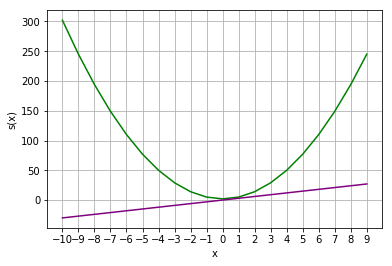

In [5]:
%matplotlib inline

# Create function s
def s(x):
    return (3*x**2) + 2

# Create function r
def r(x):
    return 3*x

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(-10, 10))

# Use the function to get the y values
y = [s(i) for i in x]

# Use the derivative function to get the derivative values
yd = [r(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('s(x)')
plt.xticks(range(-10,10, 1))
plt.yticks(range(-2000, 2000, 50))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')

plt.show()


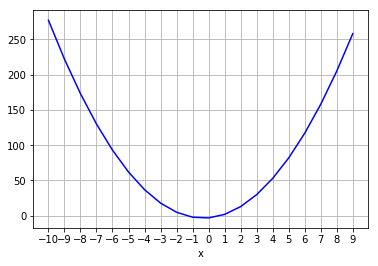

In [7]:
%matplotlib inline

# Create function s
def s(x):
    return (3*x**2) + 2*x - 3

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(-10, 10))

# Use the function to get the y values
y = [s(i) for i in x]


# Set up the graph
plt.xlabel('x')
plt.xticks(range(-10,10, 1))
plt.yticks(range(-500, 500, 50))
plt.grid()

# Plot the function
plt.plot(x,y, color='blue')
 

plt.show()

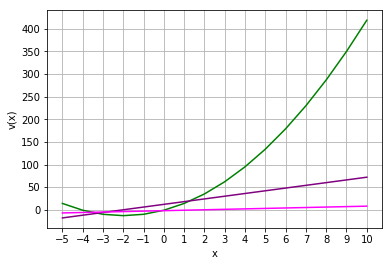

v(2) = -1
v'(2) = 12
v''(2) = -2


In [23]:
%matplotlib inline

# Create function v
def v(x):
    return 3*(x**2) + 12*x - 1

def vd(x):
    return 6*x + 12

def v2d(x):
    return  x -2

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(-5, 11))

# Use the function to get the y values
y = [v(i) for i in x]

# Use the derivative function to get the derivative values
yd = [vd(i) for i in x]

# Use the derivative function to get the derivative values
y2d = [v2d(i) for i in x]

# Set up the graph
plt.xlabel('x')
plt.ylabel('v(x)')
plt.xticks(range(-10,15, 1))
plt.yticks(range(-2000, 2000, 50))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')

# Plot the derivative
plt.plot(x,y2d, color='magenta')

plt.show()

print ("v(2) = " + str(v(0)))

print ("v'(2) = " + str(vd(0)))

print ("v''(2) = " + str(v2d(0)))


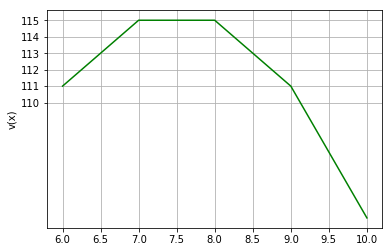

v(1) = 115.5


In [70]:
%matplotlib inline

# Create function v
def v(x):
    return -2*x**2+30*x+3
 

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(6, 11))

# Use the function to get the y values
y = [v(i) for i in x]
 



# Set up the graph 
plt.ylabel('v(x)') 
plt.yticks(range(110, 125, 1))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')
 


plt.show()

print ("v(1) = " + str(v(7.5)))
 



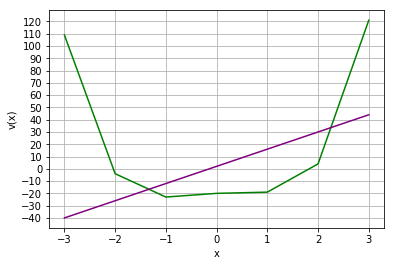

v(2) = -23
v'(2) = -12


In [82]:
%matplotlib inline

# Create function v
def v(x):
    return 2*(x**4) - 3*x**2 + 2*x - 20

def vd(x):
    return 8*x + 6*x + 2


from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(-3, 4))

# Use the function to get the y values
y = [v(i) for i in x]

# Use the derivative function to get the derivative values
yd = [vd(i) for i in x]


# Set up the graph
plt.xlabel('x')
plt.ylabel('v(x)')
plt.xticks(range(-10,15, 1))
plt.yticks(range(-100, 400, 10))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot the derivative
plt.plot(x,yd, color='purple')
 

plt.show()

print ("v(2) = " + str(v(-1)))

print ("v'(2) = " + str(vd(-1))) 


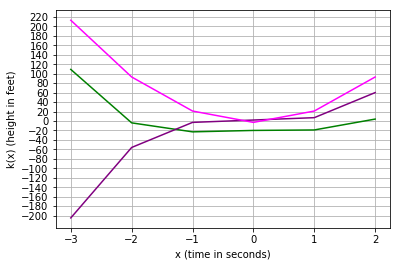

v(-1) = -23
v'(-1) = -3
v''(-1) = 21
v(0) = -20
v'(0) = 2
v''(0) = -3
v(1) = -19
v'(1) = 7
v''(1) = 21


In [91]:
%matplotlib inline

# Create function k
def k(x):
    return 2*(x**4) - 3*x**2 + 2*x - 20

def kd(x):
    return 8*(x**3) - 3*x + 2

def k2d(x):
    return 24*(x**2) - 3

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(-3, 3))

# Use the function to get the y values
y = [k(i) for i in x]

# Use the derivative function to get the k'(x) values
yd = [kd(i) for i in x]

# Use the 2-derivative function to get the k''(x)
y2d = [k2d(i) for i in x]

# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(-3, 3, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot  k'(x)
plt.plot(x,yd, color='purple')

# Plot k''(x)
plt.plot(x,y2d, color='magenta')

plt.show()


print ("v(-1) = " + str(k(-1)))
print ("v'(-1) = " + str(kd(-1))) 
print ("v''(-1) = " + str(k2d(-1))) 
print ("v(0) = " + str(k(0)))
print ("v'(0) = " + str(kd(0))) 
print ("v''(0) = " + str(k2d(0))) 
print ("v(1) = " + str(k(1)))
print ("v'(1) = " + str(kd(1))) 
print ("v''(1) = " + str(k2d(1))) 

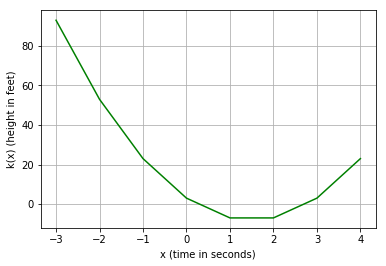

v(-1) = 23
v(0) = 3
v(1) = -7
v(2) = -7
v(3) = 3


In [95]:
%matplotlib inline

# Create function k
def k(x):
    return 5*(x**2) - 15*x + 3
 

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(-3, 5))

# Use the function to get the y values
y = [k(i) for i in x]

 

# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(-3, 5, 1))
plt.yticks(range(-200, 500, 20))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')
 

plt.show()

print ("v(-1) = " + str(k(-1)))
print ("v(0) = " + str(k(0))) 
print ("v(1) = " + str(k(1))) 
print ("v(2) = " + str(k(2))) 
print ("v(3) = " + str(k(3))) 

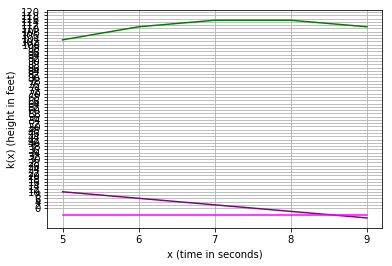

v(-1) = 111
v'(-1) = 6
v''(-1) = -4
v(-1) = 115
v'(-1) = 2
v''(-1) = -4
v(-1) = 115.5
v'(-1) = 0.0
v''(-1) = -4
v(0) = 115
v'(0) = -2
v''(0) = -4
v(0) = 113.5
v'(0) = -4.0
v''(0) = -4
v(1) = 111
v'(1) = -6
v''(1) = -4


In [107]:
%matplotlib inline

# Create function k
def k(x):
    return -2*(x**2) + 30*x + 3

def kd(x):
    return -4*x + 30

def k2d(x):
    return -4

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(5, 10))

# Use the function to get the y values
y = [k(i) for i in x]

# Use the derivative function to get the k'(x) values
yd = [kd(i) for i in x]

# Use the 2-derivative function to get the k''(x)
y2d = [k2d(i) for i in x]

# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(5, 10, 1))
plt.yticks(range(0, 200, 2))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot  k'(x)
plt.plot(x,yd, color='purple')

# Plot k''(x)
plt.plot(x,y2d, color='magenta')

plt.show()

print ("v(-1) = " + str(k(6)))
print ("v'(-1) = " + str(kd(6))) 
print ("v''(-1) = " + str(k2d(6))) 
print ("v(-1) = " + str(k(7)))
print ("v'(-1) = " + str(kd(7))) 
print ("v''(-1) = " + str(k2d(7))) 
print ("v(-1) = " + str(k(7.5)))
print ("v'(-1) = " + str(kd(7.5))) 
print ("v''(-1) = " + str(k2d(7.5)))
print ("v(0) = " + str(k(8)))
print ("v'(0) = " + str(kd(8))) 
print ("v''(0) = " + str(k2d(8))) 
print ("v(0) = " + str(k(8.5)))
print ("v'(0) = " + str(kd(8.5))) 
print ("v''(0) = " + str(k2d(8.5))) 
print ("v(1) = " + str(k(9)))
print ("v'(1) = " + str(kd(9))) 
print ("v''(1) = " + str(k2d(9))) 

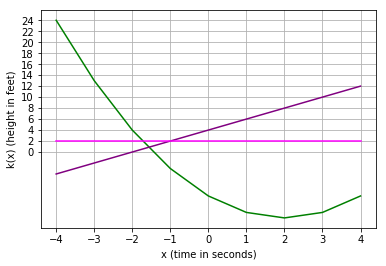

v(2) = -12
v'(2) = 8
v''(2) = 2


In [109]:
%matplotlib inline

# Create function k
def k(x):
    return (x**2) - 4*x - 8

def kd(x):
    return 2*x + 4

def k2d(x):
    return 2

from matplotlib import pyplot as plt

# Create an array of x values to plot
x = list(range(-4, 5))

# Use the function to get the y values
y = [k(i) for i in x]

# Use the derivative function to get the k'(x) values
yd = [kd(i) for i in x]

# Use the 2-derivative function to get the k''(x)
y2d = [k2d(i) for i in x]

# Set up the graph
plt.xlabel('x (time in seconds)')
plt.ylabel('k(x) (height in feet)')
plt.xticks(range(-4, 5, 1))
plt.yticks(range(0, 200, 2))
plt.grid()

# Plot the function
plt.plot(x,y, color='green')

# Plot  k'(x)
plt.plot(x,yd, color='purple')

# Plot k''(x)
plt.plot(x,y2d, color='magenta')

plt.show() 

print ("v(2) = " + str(k(2)))
print ("v'(2) = " + str(kd(2))) 
print ("v''(2) = " + str(k2d(2))) 